<a href="https://colab.research.google.com/github/minhcong01/Baitap_AI/blob/main/fashion_mnist_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# BAI TAP TRAIN DATA FASHION MNIST
#thu vien
import tensorflow as tf
from keras import datasets, layers, models
from keras.models import Sequential, Model
from keras.layers import Dense,Activation,Dropout, Flatten,Conv2D,MaxPooling2D
from tensorflow.keras.optimizers import SGD
from matplotlib import pyplot as plt
from keras.utils import np_utils
import numpy as np

In [4]:
#tai du lieu
(X_train, y_train),(X_test,y_test)=datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [5]:
#Dac diem du lieu
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


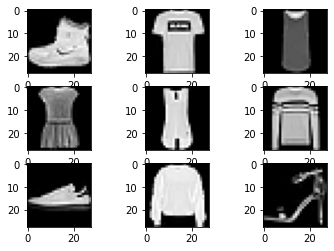

In [6]:
#tao luoi anh 3x3
for i in range(9):
  plt.subplot(330+1+i)
  plt.imshow(X_train[i],cmap=plt.get_cmap('gray'))
plt.show()
X_train=X_train.astype ('float32')
X_test=X_test.astype ('float32')
X_train/=255
X_test/=255
y_train=np_utils.to_categorical (y_train,10)
y_test = np_utils.to_categorical(y_test,10)

In [7]:
#tao mo hinh 
model=Sequential()
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(28,28,1)))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 12544)             0         
                                                                 
 dense (Dense)               (None, 128)               1605760   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                        

In [8]:
opt=SGD(lr=0.01,momentum=0.9)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(X_train,y_train,epochs=10,batch_size=64,validation_data=(X_test,y_test),verbose=1)
model.save('fashion_mnist_CNN.h5')

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/10
938/938 [==============================] - 27s 17ms/step - loss: 0.3916 - accuracy: 0.8594 - val_loss: 0.3058 - val_accuracy: 0.8872
Epoch 2/10
938/938 [==============================] - 15s 16ms/step - loss: 0.2575 - accuracy: 0.9058 - val_loss: 0.2659 - val_accuracy: 0.9021
Epoch 3/10
938/938 [==============================] - 17s 18ms/step - loss: 0.2063 - accuracy: 0.9235 - val_loss: 0.2551 - val_accuracy: 0.9063
Epoch 4/10
938/938 [==============================] - 15s 16ms/step - loss: 0.1698 - accuracy: 0.9388 - val_loss: 0.2371 - val_accuracy: 0.9155
Epoch 5/10
938/938 [==============================] - 15s 17ms/step - loss: 0.1395 - accuracy: 0.9489 - val_loss: 0.2355 - val_accuracy: 0.9165
Epoch 6/10
938/938 [==============================] - 16s 17ms/step - loss: 0.1141 - accuracy: 0.9591 - val_loss: 0.2356 - val_accuracy: 0.9210
Epoch 7/10
938/938 [==============================] - 15s 16ms/step - loss: 0.0930 - accuracy: 0.9661 - val_loss: 0.2539 - val_accuracy:

In [9]:
# ket qua cua qua trinh train va test
score=model.evaluate(X_test,y_test,verbose=0)
print('sai so kien tra la:',score[0])
print('Do chinh xac kiem tra:', score[1])

sai so kien tra la: 0.2958316504955292
Do chinh xac kiem tra: 0.9232000112533569


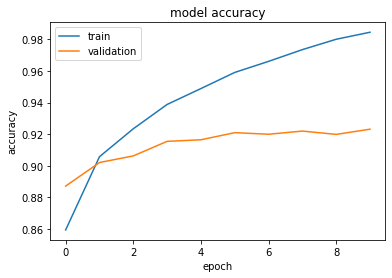

In [10]:
#do thi bieu dien kq train
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()

In [20]:
from google.colab import files
img = files.upload()

Saving Bag.jpg to Bag.jpg


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


Ảnh: Bag


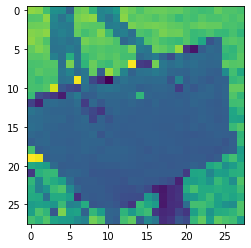

In [29]:
# Nhận dạng
from keras.preprocessing.image import load_img, img_to_array
from keras.models import load_model
import numpy as np
model500 = load_model('fashion_mnist_CNN.h5')
img = load_img('Bag.jpg',grayscale=True, target_size = (28, 28))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,28,28,1)
img = img.astype('float32')
img /= 255
pred = int(np.argmax(model500.predict(img), axis = 1))
a = ['Shirt','T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat','Sneaker' ,'Sandal', 'Bag', 'Ankle boot']
print('Ảnh:',a[pred])